In [2]:
import tensorflow as tf

In [4]:
hello = tf.constant('Hello World!')
sess = tf.Session()
print(sess.run(hello))

b'Hello World!'


In [30]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


## Q1 - 

## Q2 - 

In [6]:
def TRAIN_SIZE(num):
 print ('Total Training Images in Dataset = ' +
str(mnist.train.images.shape))
 print ('--------------------------------------------------')
 x_train = mnist.train.images[:num,:]
 print ('x_train Examples Loaded = ' + str(x_train.shape))
 y_train = mnist.train.labels[:num,:]
 print ('y_train Examples Loaded = ' + str(y_train.shape))
 print('')
 return x_train, y_train
def TEST_SIZE(num):
 print ('Total Test Examples in Dataset = ' +
str(mnist.test.images.shape))
 print ('--------------------------------------------------')
 x_test = mnist.test.images[:num,:]
 print ('x_test Examples Loaded = ' + str(x_test.shape))
 y_test = mnist.test.labels[:num,:]
 print ('y_test Examples Loaded = ' + str(y_test.shape))
 return x_test, y_test


In [8]:
import matplotlib.pyplot as plt
import random as ran
import numpy as np
def display_digit(num):
 print(y_train[num])
 label = y_train[num].argmax(axis=0)
 image = x_train[num].reshape([28,28])
 plt.title('Example: %d Label: %d' % (num, label))
 plt.imshow(image, cmap=plt.get_cmap('gray_r'))
 plt.show()
def display_mult_flat(start, stop):
 images = x_train[start].reshape([1,784])
 for i in range(start+1,stop):
     images = np.concatenate((images, x_train[i].reshape([1,784])))
     plt.imshow(images, cmap=plt.get_cmap('gray_r'))
     plt.show()

In [9]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



In [10]:
x_test, y_test = TEST_SIZE(10000)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


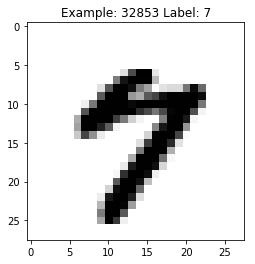

In [11]:
display_digit(ran.randint(0, x_train.shape[0]))

In [12]:
sess = tf.Session()
# Input and output
x = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes)
# Model parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

## Q3 -

In [14]:
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
LEARNING_RATE = 0.1
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),
reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Use tf.cast instead.


## Q4 - 

In [17]:
TRAIN_STEPS = 250
for i in range(TRAIN_STEPS+1):
 sess.run(training, feed_dict={x: x_train, y_: y_train})
 if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' +str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + ' Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0 Accuracy = 0.6705 Loss = 2.1970637
Training Step:100 Accuracy = 0.8713 Loss = 0.6085837
Training Step:200 Accuracy = 0.8857 Loss = 0.49071002


## Q5 - 

In [20]:
# Input and output
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes)
# Two hidden layers, output layer and their number of neurons (the last layer has 10 softmax neurons)
L = 100
M = 30
# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([L]))
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.zeros([M]))
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1))
B3 = tf.Variable(tf.zeros([10]))
# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Ylogits = tf.matmul(Y2, W3) + B3
Y = tf.nn.softmax(Ylogits)

In [22]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits,
labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [23]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [25]:
LEARNING_RATE = 0.01
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
TRAIN_STEPS = 1000
for i in range(TRAIN_STEPS+1):
 sess.run(training, feed_dict={X: x_train, Y_: y_train})
 if i%100 == 0:
  print('Training Step:' + str(i) + ' Accuracy = ' + str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test})) + ' Loss = ' + str(sess.run(cross_entropy, {X: x_train, Y_: y_train})))

Training Step:0 Accuracy = 0.1135 Loss = 230.05872
Training Step:100 Accuracy = 0.7608 Loss = 91.249374
Training Step:200 Accuracy = 0.8747 Loss = 47.874676
Training Step:300 Accuracy = 0.9014 Loss = 36.56628
Training Step:400 Accuracy = 0.9124 Loss = 31.516329
Training Step:500 Accuracy = 0.9208 Loss = 28.062332
Training Step:600 Accuracy = 0.9296 Loss = 25.254715
Training Step:700 Accuracy = 0.935 Loss = 22.878113
Training Step:800 Accuracy = 0.9408 Loss = 20.860199
Training Step:900 Accuracy = 0.9448 Loss = 19.143814
Training Step:1000 Accuracy = 0.9486 Loss = 17.67248


In [26]:
# Drop Out

# Input and output
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes)
pkeep = tf.placeholder(tf.float32)
L = 100
M = 30
N = 60
O = 30
# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1))
B3 = tf.Variable(tf.zeros([10]))
# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)
Ylogits = tf.matmul(Y2d, W3) + B3
Y = tf.nn.softmax(Ylogits)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits,
labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
LEARNING_RATE = 0.01
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
TRAIN_STEPS = 1000
for i in range(TRAIN_STEPS+1):
 sess.run(training, feed_dict={X: x_train, Y_: y_train, pkeep: 0.75 })
 if i%100 == 0:
  print('Training Step:' + str(i) + ' Accuracy = ' + str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test, pkeep: 1.0})) + ' Loss = ' + str(sess.run(cross_entropy, {X: x_train, Y_: y_train , pkeep: 0.75})))

Training Step:0 Accuracy = 0.276 Loss = 221.87068
Training Step:100 Accuracy = 0.9109 Loss = 36.924397
Training Step:200 Accuracy = 0.9452 Loss = 22.292372
Training Step:300 Accuracy = 0.9554 Loss = 17.025251
Training Step:400 Accuracy = 0.9626 Loss = 13.69154
Training Step:500 Accuracy = 0.9684 Loss = 11.143867
Training Step:600 Accuracy = 0.9705 Loss = 9.514872
Training Step:700 Accuracy = 0.9729 Loss = 8.109653
Training Step:800 Accuracy = 0.9733 Loss = 7.490014
Training Step:900 Accuracy = 0.9734 Loss = 6.5966167
Training Step:1000 Accuracy = 0.9525 Loss = 19.962326
